# Looking at movies that were not first released in the US 

Importing packages 

In [1]:
import pandas as pd
import numpy as np
import pickle 

Loading pickled dataframe

In [2]:
earliestrelease_notdomestic_movies = pd.read_pickle('earliestrelease_notdomestic_movies.pickle')

In [3]:
earliestrelease_notdomestic_movies.shape

(1659, 20)

In [4]:
earliestrelease_notdomestic_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, Hero to News from Planet Mars
Data columns (total 20 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   link_stub                                 1659 non-null   object        
 1   gross_rank                                1659 non-null   float64       
 2   lifetime_gross                            1659 non-null   float64       
 3   max_theaters                              1651 non-null   float64       
 4   domestic_opening                          1591 non-null   float64       
 5   num_opening_theaters                      1593 non-null   float64       
 6   release_date                              1659 non-null   datetime64[ns]
 7   domestic_distributor                      1609 non-null   object        
 8   domestic_total_gross                      1659 non-null   float64       
 9   international_t

Dropping columns with too few values 

In [5]:
earliestrelease_notdomestic_movies.drop(columns=["budget", "rating", "original_release_markets_num"], inplace=True)

Dropping useless columns

In [6]:
earliestrelease_notdomestic_movies.drop(columns=["link_stub", "gross_rank"], inplace=True)

In [7]:
earliestrelease_notdomestic_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, Hero to News from Planet Mars
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   lifetime_gross                            1659 non-null   float64       
 1   max_theaters                              1651 non-null   float64       
 2   domestic_opening                          1591 non-null   float64       
 3   num_opening_theaters                      1593 non-null   float64       
 4   release_date                              1659 non-null   datetime64[ns]
 5   domestic_distributor                      1609 non-null   object        
 6   domestic_total_gross                      1659 non-null   float64       
 7   international_total_gross                 1659 non-null   float64       
 8   earliest_release_location                 1659 non-null   object        
 9   runtime        

In [8]:
earliestrelease_notdomestic_movies.describe()

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,domestic_total_gross,international_total_gross,runtime,earliest_release_location_opening_gross,earliest_release_location_original_gross
count,1.659000e+03,1651.000000,1.591000e+03,1593.000000,1.659000e+03,1.659000e+03,1612.000000,1.524000e+03,1.653000e+03
mean,8.491429e+05,57.920048,1.730617e+05,33.879473,8.539992e+05,1.664137e+07,115.647643,2.890283e+05,1.215032e+06
std,2.821794e+06,151.209278,6.870225e+05,104.516808,2.832227e+06,5.009104e+07,24.045475,3.956131e+06,1.147474e+07
min,3.100000e+02,1.000000,2.400000e+01,1.000000,3.100000e+02,9.260000e+02,66.000000,2.400000e+01,1.960000e+02
25%,3.683600e+04,5.000000,6.167500e+03,1.000000,3.683600e+04,5.731295e+05,99.000000,7.487250e+03,4.382000e+04
50%,1.569180e+05,17.000000,2.130700e+04,4.000000,1.571210e+05,3.332196e+06,111.000000,2.557900e+04,1.816330e+05
75%,6.752005e+05,59.000000,9.530000e+04,26.000000,6.752005e+05,1.263379e+07,129.000000,1.211982e+05,7.235930e+05
max,5.371002e+07,2503.000000,1.780000e+07,2031.000000,5.371002e+07,8.676043e+08,366.000000,1.521634e+08,4.511766e+08


### Trying to understand missing values 

In [9]:
earliestrelease_notdomestic_movies[earliestrelease_notdomestic_movies['domestic_distributor'].isna()]

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,release_date,domestic_distributor,domestic_total_gross,international_total_gross,earliest_release_location,runtime,genres,crew,cast,earliest_release_location_opening_gross,earliest_release_location_original_gross
The Wandering Earth,5971413.0,129.0,1685287.0,64.0,2019-02-05,None,5971413.0,693885286.0,Australia,125.0,Action Sci-Fi,"Frant Gwo Director, Gong Geer Writer, Junce Ye...","Jing Wu, Chuxiao Qu, Guangjie Li, Man-Tat Ng",1685287.0,5971413.0
Uri: The Surgical Strike,4186168.0,132.0,631146.0,101.0,2019-01-11,None,4186168.0,35160409.0,"APAC, EMEA",138.0,Action Drama War,"Aditya Dhar Director, Aditya Dhar Writer, Ronn...","Vicky Kaushal, Paresh Rawal, Mohit Raina, Yami...",631146.0,4186168.0
2.0,4152000.0,314.0,2775000.0,314.0,2018-11-30,None,4152000.0,32793969.0,"APAC, EMEA",148.0,Action Sci-Fi,"S. Shankar Director, Jayamohan Writer, Lakshmi...","Rajinikanth, Akshay Kumar, Amy Jackson, Adil H...",2775000.0,4152000.0
Kabali,3903095.0,236.0,2157621.0,236.0,2016-07-21,None,3903095.0,485694.0,France,153.0,Action Crime Drama,"Pa. Ranjith Director, Pa. Ranjith Writer, Kala...","Rajinikanth, Winston Chao, Radhika Apte, Dhansika",2157621.0,3903095.0
"My People, My Country",2356683.0,83.0,876001.0,67.0,2019-10-01,None,2356683.0,447708310.0,China,154.0,Drama History,"Kaige Chen Director, Hu Guan Director, Hao Nin...","Bo Huang, Qianyuan Wang, Hao Ou, Bai Qing Xin",876001.0,2356683.0
Main Prem Ki Diwani Hoon,1232228.0,60.0,672891.0,60.0,2003-06-27,None,1232228.0,5058114.0,3 markets,197.0,Comedy Drama Musical Romance,"Sooraj R. Barjatya Director, Sooraj R. Barjaty...","Hrithik Roshan, Kareena Kapoor, Abhishek Bachc...",672891.0,1232228.0
Rustom,1087419.0,133.0,773662.0,133.0,2016-08-12,None,1087419.0,571175.0,APAC,148.0,Crime Drama Thriller,"Dharmendra Suresh Desai Director, Vipul K. Raw...","Akshay Kumar, Ileana D'Cruz, Manoj Bajpayee, E...",773662.0,1087419.0
Nothing to Lose,1016188.0,69.0,679531.0,69.0,2018-05-11,None,1016188.0,35059129.0,Brazil,134.0,Biography Drama,"Alexandre Avancini Director, Stephen P. Lindse...","Petrônio Gontijo, Day Mesquita, Beth Goulart, ...",679531.0,1016188.0
Golmaal Again,1013893.0,265.0,1013893.0,265.0,2017-10-20,None,1013893.0,1044205.0,APAC,140.0,Action Comedy Fantasy Horror,"Rohit Shetty Director, Rohit Shetty Writer, Yu...","Ajay Devgn, Arshad Warsi, Tabu, Shreyas Talpade",1013893.0,1013893.0
Garam Masala,1007943.0,42.0,395708.0,42.0,2006-11-03,None,1007943.0,1083755.0,United Kingdom,146.0,Comedy,"Priyadarshan Director, Priyadarshan Writer, Ne...","Akshay Kumar, John Abraham, Paresh Rawal, Rimi...",395708.0,1007943.0


In [10]:
earliestrelease_notdomestic_movies[earliestrelease_notdomestic_movies['domestic_opening'].isna()]

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,release_date,domestic_distributor,domestic_total_gross,international_total_gross,earliest_release_location,runtime,genres,crew,cast,earliest_release_location_opening_gross,earliest_release_location_original_gross
The Class,3766810.0,126.0,NaN,NaN,2008-12-19,Sony Pictures Classics,3766810.0,25536695.0,EMEA,128.0,Drama,"Laurent Cantet Director, Laurent Cantet Writer...","François Bégaudeau, Agame Malembo-Emene, Angél...",NaN,3766810.0
Asterix & Obelix: Mission Cleopatra,3115188.0,NaN,NaN,NaN,2002-06-07,Lionsgate,3115188.0,124912788.0,France,107.0,Adventure Comedy Family Fantasy,"Alain Chabat Director, René Goscinny Writer, A...","Gérard Depardieu, Christian Clavier, Jamel Deb...",NaN,1444514.0
Monsieur Ibrahim,2823890.0,92.0,NaN,NaN,2003-12-03,Sony Pictures Classics,2823890.0,9540946.0,Italy,96.0,Comedy Drama,"François Dupeyron Director, François Dupeyron ...","Omar Sharif, Pierre Boulanger, Gilbert Melki, ...",NaN,2823890.0
The Chorus,2087128.0,34.0,NaN,NaN,2004-10-01,Alliance Atlantis Vivafilm,3635164.0,84750780.0,EMEA,97.0,Comedy Drama Music,"Christophe Barratier Director, Georges Chapero...","Gérard Jugnot, François Berléand, Jean-Baptist...",NaN,2087128.0
Never Look Away,1304042.0,122.0,NaN,NaN,2018-11-30,Sony Pictures Classics,1304042.0,4889192.0,Germany,189.0,Biography Drama Romance Thriller War,"Florian Henckel von Donnersmarck Director, Flo...","Tom Schilling, Sebastian Koch, Paula Beer, Sas...",NaN,1304042.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
The Student,1126.0,1.0,NaN,NaN,2017-04-14,Under The Milky Way,1126.0,316997.0,Russia/CIS,118.0,Drama,"Kirill Serebrennikov Director, Kirill Serebren...","Pyotr Skvortsov, Viktoriya Isakova, Yuliya Aug...",NaN,1126.0
Paris Countdown,1055.0,NaN,NaN,NaN,2013-11-08,Screen Media Films,1055.0,707702.0,EMEA,92.0,Crime Thriller,"Edgar Marie Director, Edgar Marie Writer, Cyri...","Jacques Gamblin, Olivier Marchal, Carlo Brandt...",NaN,1055.0
Billy and Buddy,894.0,2.0,NaN,NaN,2013-11-08,Distrib Films,894.0,17399159.0,EMEA,82.0,Comedy Family,"Alexandre Charlot Director, Franck Magnier Dir...","Franck Dubosc, Marina Foïs, Charles Crombez, N...",NaN,894.0
It's Hard Being Loved by Jerks,697.0,7.0,NaN,NaN,2015-03-13,Kino Lorber,697.0,304633.0,EMEA,110.0,Documentary,"Daniel Leconte Director, Daniel Leconte Produc...","Elisabeth Badinter, François Bayrou, Christoph...",3000.0,3000.0


In [10]:
earliestrelease_notdomestic_movies.dropna().shape

(1421, 15)

In [11]:
earliestrelease_notdomestic_movies.dropna().describe()

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,domestic_total_gross,international_total_gross,runtime,earliest_release_location_opening_gross,earliest_release_location_original_gross
count,1.421000e+03,1421.000000,1.421000e+03,1421.000000,1.421000e+03,1.421000e+03,1421.000000,1.421000e+03,1.421000e+03
mean,8.699105e+05,59.974666,1.660409e+05,33.819141,8.741958e+05,1.615200e+07,115.786770,2.815722e+05,1.243649e+06
std,2.664652e+06,150.502798,5.436920e+05,95.699561,2.676532e+06,4.759297e+07,23.926242,4.068948e+06,1.227380e+07
min,3.100000e+02,1.000000,2.400000e+01,1.000000,3.100000e+02,9.260000e+02,66.000000,2.400000e+01,1.960000e+02
25%,4.054800e+04,5.000000,6.447000e+03,2.000000,4.054800e+04,6.131670e+05,99.000000,7.235000e+03,4.474500e+04
50%,1.754930e+05,19.000000,2.216800e+04,4.000000,1.757020e+05,3.500000e+06,111.000000,2.476800e+04,1.842920e+05
75%,7.021660e+05,63.000000,9.557700e+04,27.000000,7.021660e+05,1.268162e+07,129.000000,1.157080e+05,7.258540e+05
max,5.336975e+07,2503.000000,1.056400e+07,1806.000000,5.336975e+07,8.676043e+08,366.000000,1.521634e+08,4.511766e+08


In [11]:
earliestrelease_notdomestic_movies.domestic_distributor.fillna('Missing', inplace=True)

In [30]:
earliestrelease_notdomestic_movies.crew.fillna('Missing', inplace=True)
earliestrelease_notdomestic_movies.cast.fillna('Missing', inplace=True)

### Deciding whether to impute missing values with mean, median or mode

Looking at max_theaters

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='max_theaters'>

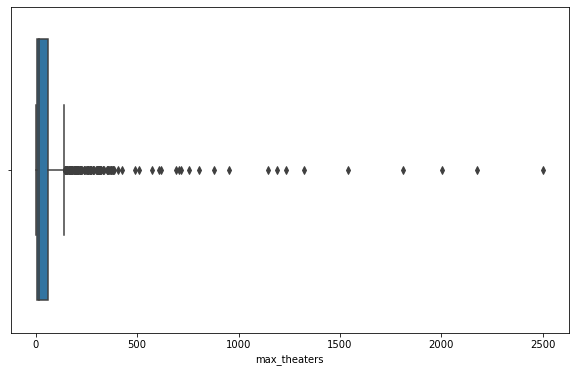

In [13]:
import seaborn as sns 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.max_theaters)

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='max_theaters', ylabel='Density'>

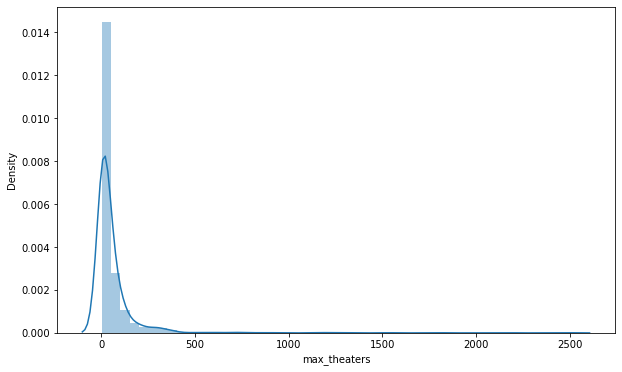

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(earliestrelease_notdomestic_movies.max_theaters)

Imputing max_theaters missing values with median due to skew 

In [15]:
earliestrelease_notdomestic_movies.max_theaters.fillna(earliestrelease_notdomestic_movies.max_theaters.median(), inplace=True)

Looking at domestic_opening

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='domestic_opening'>

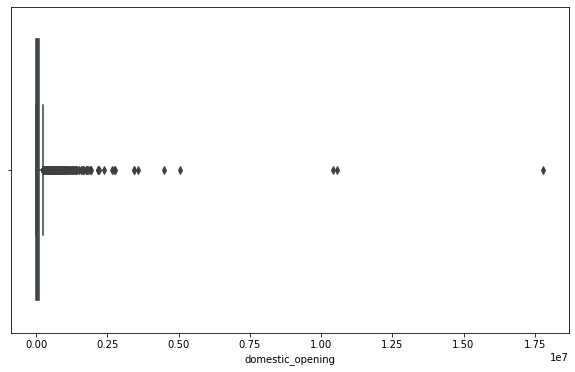

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.domestic_opening)

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='domestic_opening', ylabel='Density'>

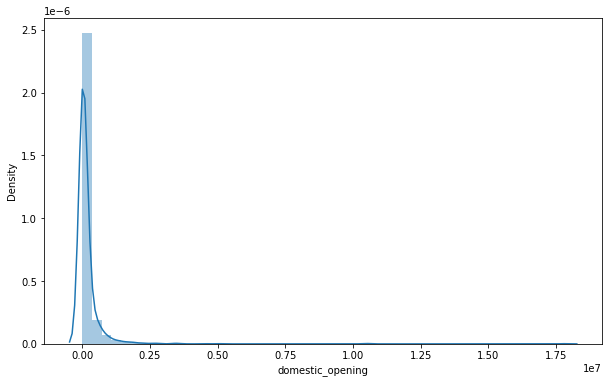

In [17]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(earliestrelease_notdomestic_movies.domestic_opening)

Imputing domestic_opening missing values with median due to skew 

In [18]:
earliestrelease_notdomestic_movies.domestic_opening.fillna(earliestrelease_notdomestic_movies.domestic_opening.median(), inplace=True)

Looking at num_opening_theaters

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_opening_theaters'>

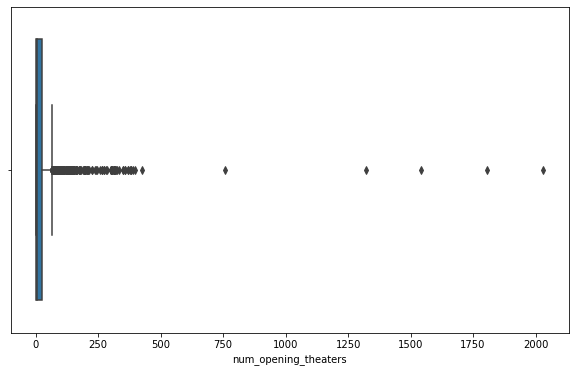

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.num_opening_theaters)

Imputing num_opening_theaters missing values with median due to skew

In [20]:
earliestrelease_notdomestic_movies.num_opening_theaters.fillna(earliestrelease_notdomestic_movies.num_opening_theaters.median(), inplace=True)

Looking at runtime

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='runtime'>

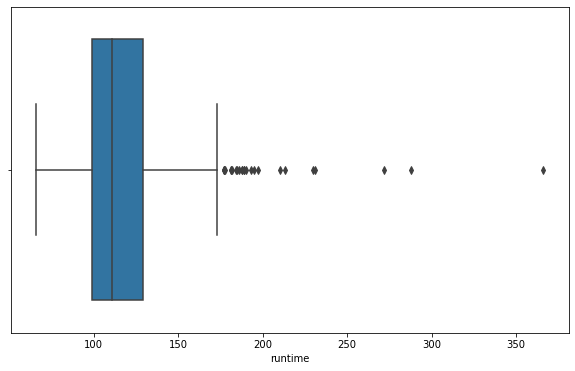

In [21]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.runtime)

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='runtime', ylabel='Density'>

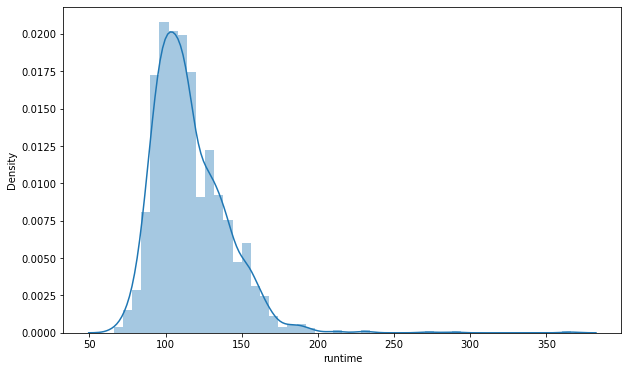

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(earliestrelease_notdomestic_movies.runtime)

Imputing runtime missing values with median due to skew

In [23]:
earliestrelease_notdomestic_movies.runtime.fillna(earliestrelease_notdomestic_movies.runtime.median(), inplace=True)

Looking at earliest_release_location_opening_gross

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='earliest_release_location_opening_gross'>

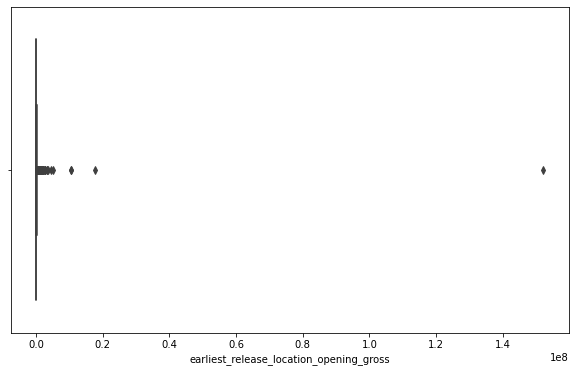

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.earliest_release_location_opening_gross)

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='earliest_release_location_opening_gross', ylabel='Density'>

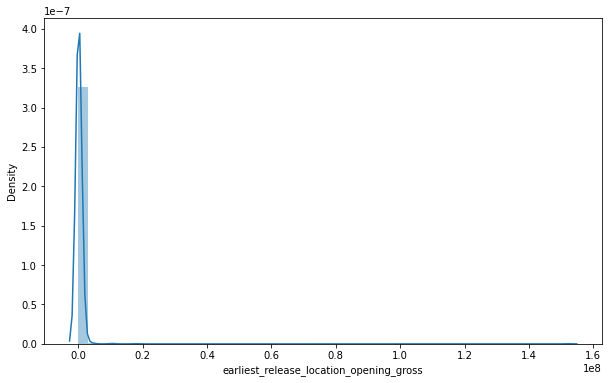

In [25]:
fig, ax = plt.subplots(figsize=(10,6))
sns.distplot(earliestrelease_notdomestic_movies.earliest_release_location_opening_gross)

Imputing earliest_release_location_opening_gross missing values with median due to skew

In [26]:
earliestrelease_notdomestic_movies.earliest_release_location_opening_gross.fillna(earliestrelease_notdomestic_movies.earliest_release_location_opening_gross.median(), inplace=True)

Looking at earliest_release_location_original_gross

/Users/ceciliabell/opt/anaconda3/envs/metis/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='earliest_release_location_original_gross'>

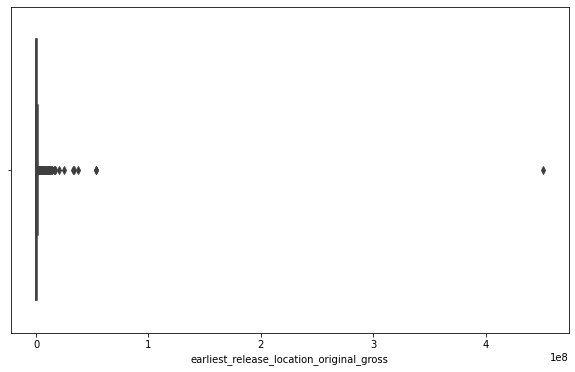

In [27]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(earliestrelease_notdomestic_movies.earliest_release_location_original_gross)

Imputing earliest_release_location_original_gross missing values with median due to skew

In [28]:
earliestrelease_notdomestic_movies.earliest_release_location_original_gross.fillna(earliestrelease_notdomestic_movies.earliest_release_location_original_gross.median(), inplace=True)

In [31]:
earliestrelease_notdomestic_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1659 entries, Hero to News from Planet Mars
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   lifetime_gross                            1659 non-null   float64       
 1   max_theaters                              1659 non-null   float64       
 2   domestic_opening                          1659 non-null   float64       
 3   num_opening_theaters                      1659 non-null   float64       
 4   release_date                              1659 non-null   datetime64[ns]
 5   domestic_distributor                      1659 non-null   object        
 6   domestic_total_gross                      1659 non-null   float64       
 7   international_total_gross                 1659 non-null   float64       
 8   earliest_release_location                 1659 non-null   object        
 9   runtime        

In [32]:
earliestrelease_notdomestic_movies.describe()

,lifetime_gross,max_theaters,domestic_opening,num_opening_theaters,domestic_total_gross,international_total_gross,runtime,earliest_release_location_opening_gross,earliest_release_location_original_gross
count,1.659000e+03,1659.000000,1.659000e+03,1659.000000,1.659000e+03,1.659000e+03,1659.000000,1.659000e+03,1.659000e+03
mean,8.491429e+05,57.722725,1.668415e+05,32.690778,8.539992e+05,1.664137e+07,115.515973,2.675903e+05,1.211295e+06
std,2.821794e+06,150.870687,6.734594e+05,102.581899,2.832227e+06,5.009104e+07,23.714760,3.792336e+06,1.145412e+07
min,3.100000e+02,1.000000,2.400000e+01,1.000000,3.100000e+02,9.260000e+02,66.000000,2.400000e+01,1.960000e+02
25%,3.683600e+04,5.000000,6.480000e+03,2.000000,3.683600e+04,5.731295e+05,99.000000,8.523000e+03,4.405550e+04
50%,1.569180e+05,17.000000,2.130700e+04,4.000000,1.571210e+05,3.332196e+06,111.000000,2.557900e+04,1.816330e+05
75%,6.752005e+05,58.000000,8.493650e+04,24.000000,6.752005e+05,1.263379e+07,128.000000,9.839100e+04,7.220540e+05
max,5.371002e+07,2503.000000,1.780000e+07,2031.000000,5.371002e+07,8.676043e+08,366.000000,1.521634e+08,4.511766e+08


Pickling cleaned dataframe for regression

In [33]:
earliestrelease_notdomestic_movies.to_pickle('earliestrelease_notdomestic_movies2.pickle')